In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from utils import fitR0
import networkx as nx
from utils import SIR_net_adaptive
import utils
import multiprocessing as mp
import time

Testing the effect of rewiring in the information network

In [2]:
N = 1000 # number of nodes
ave_degree = 10
p = ave_degree / N  # edge probability
initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
initial_no_vax = np.arange(100, 300)
#initial_no_vax = 300

mu = 1 / 7       # recovery rate
beta = 3 / 140    # infection rate
pro = 0.      # rate of classical media influence on people
pol = 0.3      # propensity of opinion polarization
r = 0.1        # rate of vaccination for PV
#gamma = 0.5
#nmax = 100

G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
G_info_static = G_phys.copy()
#utils.initNET_SI(G_info_static, I0=initial_no_vax, I_seed=np.arange(10)) # initialize information network
utils.initNET_rnd(G_info_static, initial_no_vax)
G_info_dynamic = G_info_static.copy()


sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False)
sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds)

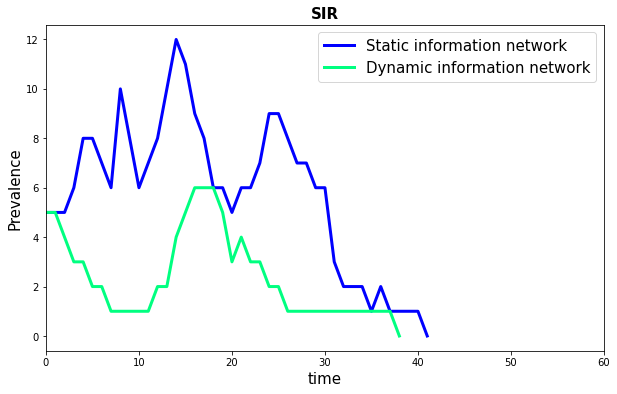

In [22]:
colors = cm.get_cmap('winter', 2)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.plot(sim_static[0], sim_static[2], lw=3, c=colors(0), label= "Static information network", alpha=1)
ax.plot(sim_dynamic[0], sim_dynamic[2], lw=3, c=colors(1), label= "Dynamic information network", alpha=1)
ax.set_title('SIR', fontweight='bold', size=15)
ax.legend(fontsize=15)
ax.set_ylabel("Prevalence", size=15)
ax.set_xlabel("time", size=15)
ax.set_xlim(0, 60);

infoNET clustering coefficients:
static: 0.037373457645105426
dynamic: 0.10790089978496542


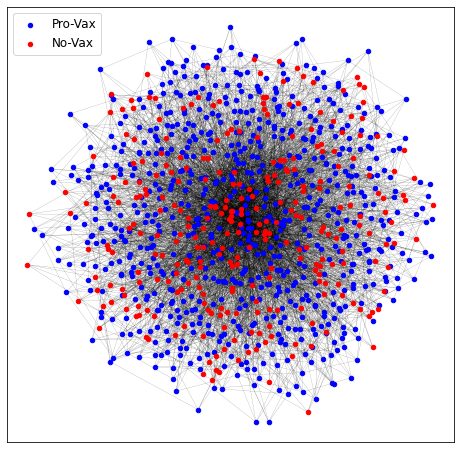

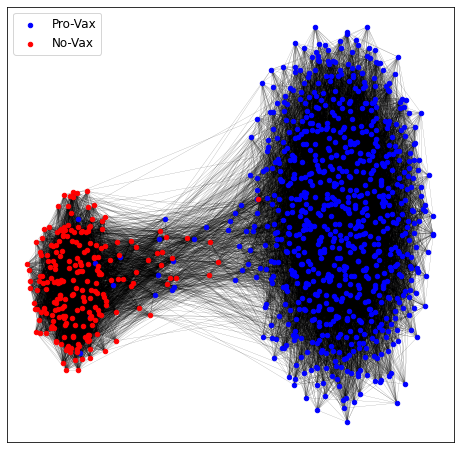

In [23]:
print('infoNET clustering coefficients:')
print('static:', nx.algorithms.cluster.average_clustering(G_info_static))
print('dynamic:', nx.algorithms.cluster.average_clustering(G_info_dynamic))
utils.plot_info_network(G_info_static)
utils.plot_info_network(G_info_dynamic)

Da quì in poi non va, bisogna riadattarlo alla funzione SIR_net_adaptive

In [2]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 15
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100,300)


    mu = 0.1       # recovery rate
    beta = 0.15    # infection rate
    pro = 0.      # rate of classical media influence on people
    pol = 0.5      # propensity of opinion polarization
    r = 0.3       # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [3]:
nsim = 12
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [4]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

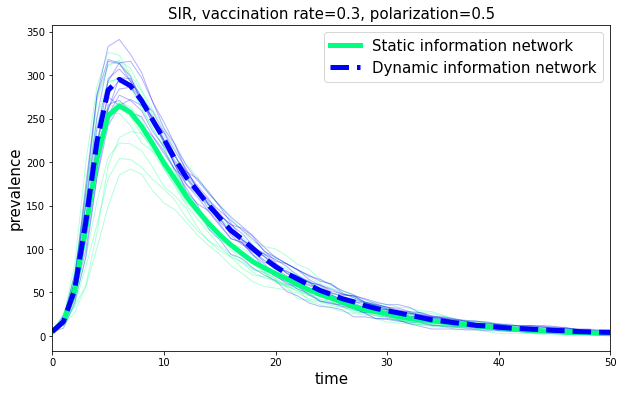

In [5]:
r = 0.3
pol = 0.5
colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

### Prove Michele al variare di beta

In [61]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100,300)


    mu = 1/7       # recovery rate
    beta = 0.15    # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [62]:
nsim = 12
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [63]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

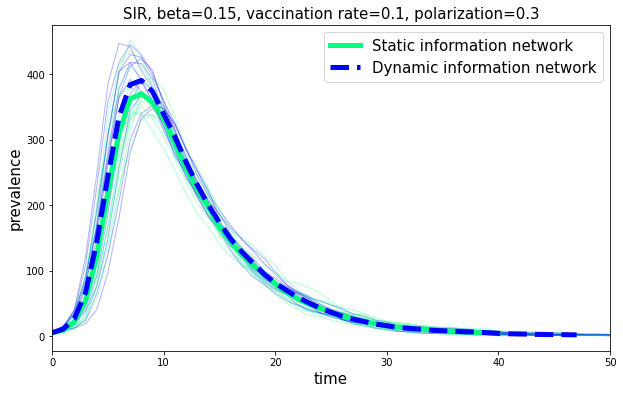

In [64]:
beta = 0.15    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

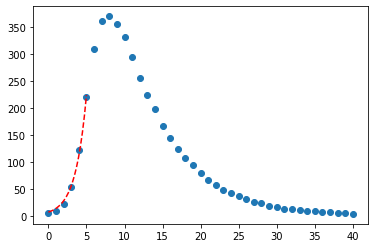

G = 0.6948778050689732

R0 = 5.864144635482813


In [65]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 6)

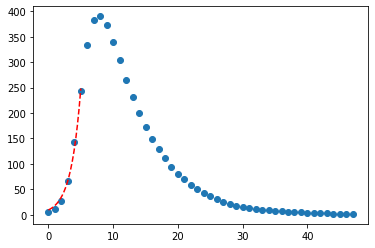

G = 0.6541413041909983

R0 = 5.578989129336987


In [67]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 6)

In [68]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100,300)


    mu = 1/7       # recovery rate
    beta = 0.1     # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [69]:
nsim = 12
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [70]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

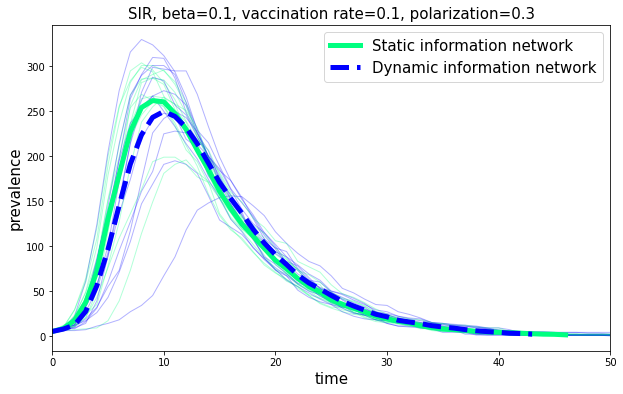

In [71]:
beta = 0.1     # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

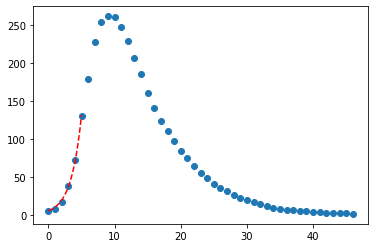

G = 0.6385893486505514

R0 = 5.4701254405538595


In [77]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 6)

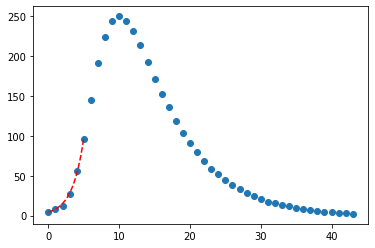

G = 0.6209175254305364

R0 = 5.346422678013754


In [76]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 6)

In [78]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100, 300)


    mu = 1/7       # recovery rate
    beta = 0.08    # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [79]:
nsim = 12
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [80]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

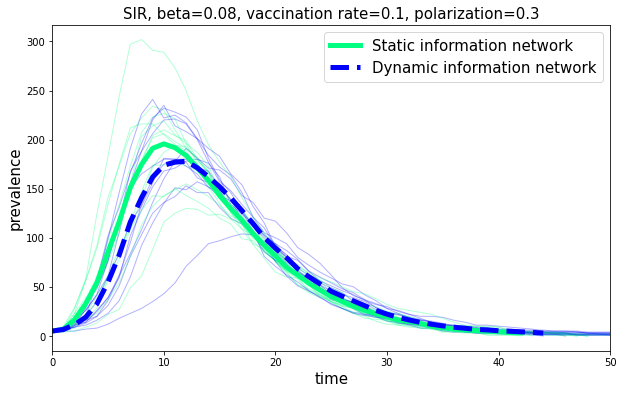

In [81]:
beta = 0.08    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

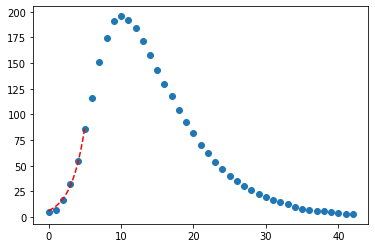

G = 0.5254825350405393

R0 = 4.678377745283775


In [86]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 6)

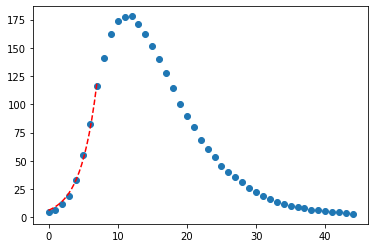

G = 0.4240205206193511

R0 = 3.9681436443354574


In [85]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 8)

In [171]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100, 300)


    mu = 1/7       # recovery rate
    beta = 0.07    # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [172]:
nsim = 12
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [173]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

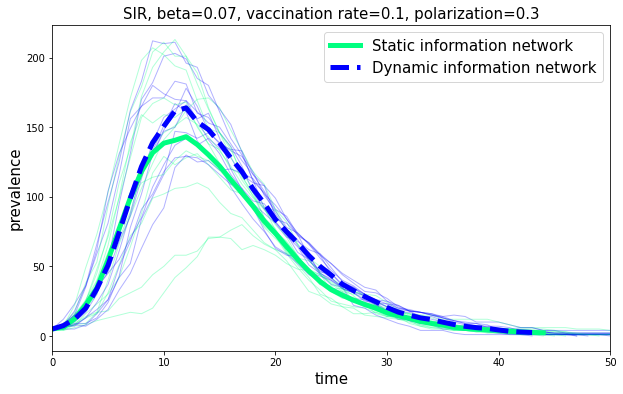

In [174]:
beta = 0.07    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

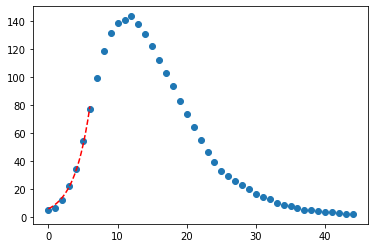

G = 0.43100604553056465

R0 = 4.017042318713953


In [175]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 7)

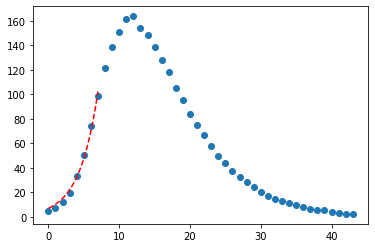

G = 0.3817832532254502

R0 = 3.6724827725781513


In [176]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 8)

In [124]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100, 300)


    mu = 1/7       # recovery rate
    beta = 0.06    # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [125]:
nsim = 12
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [126]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

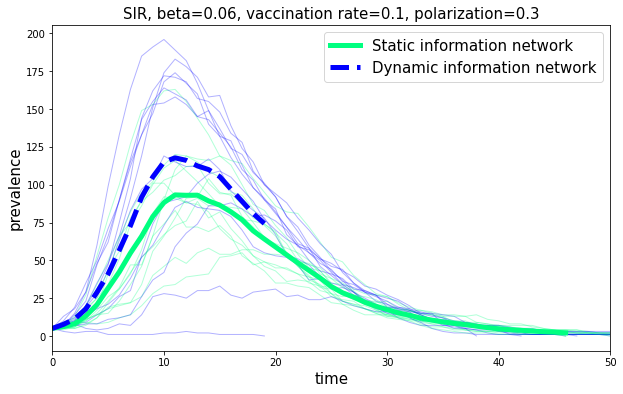

In [127]:
beta = 0.06    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

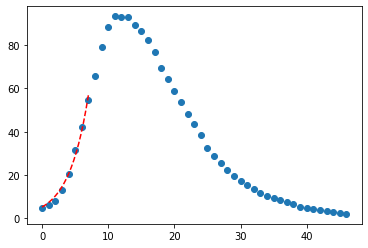

G = 0.3405063869346655

R0 = 3.3835447085426584


In [130]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 8)

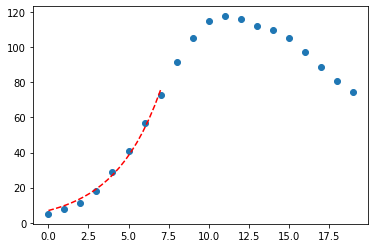

G = 0.3413840374650141

R0 = 3.389688262255099


In [129]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 8)

In [93]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100,300)


    mu = 1/7       # recovery rate
    beta = 0.05    # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [94]:
nsim = 12
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [95]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

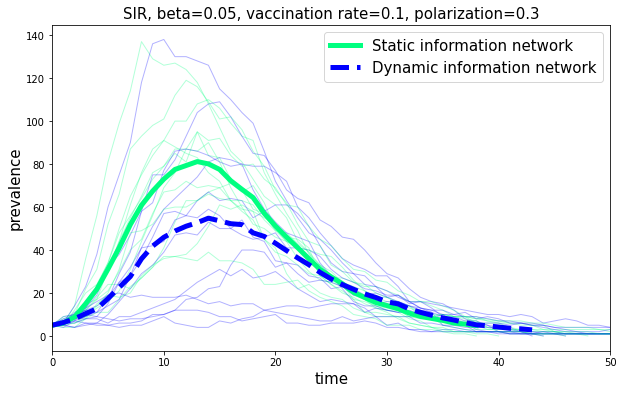

In [96]:
beta = 0.05    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

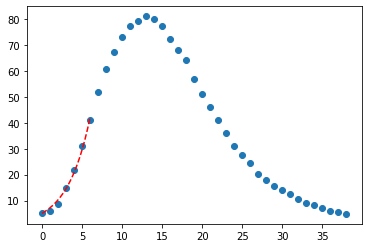

G = 0.35290469578047595

R0 = 3.4703328704633316


In [100]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 7)

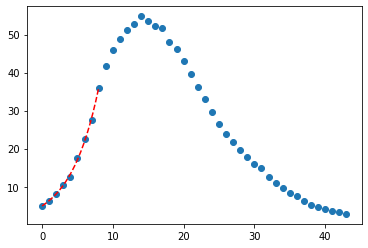

G = 0.24839167990781835

R0 = 2.7387417593547285


In [101]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 9)

In [102]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100,300)


    mu = 1/7       # recovery rate
    beta = 0.04    # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [103]:
nsim = 12
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [104]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

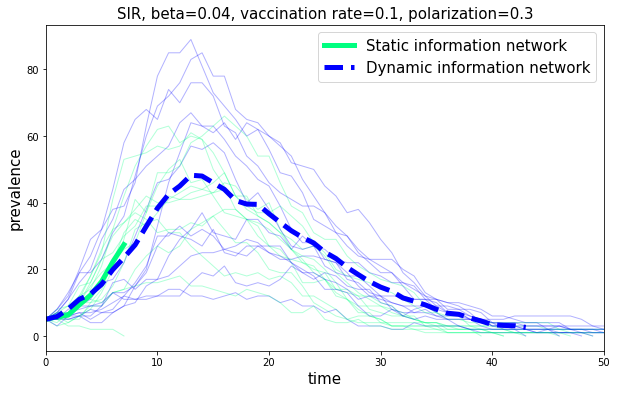

In [105]:
beta = 0.04    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

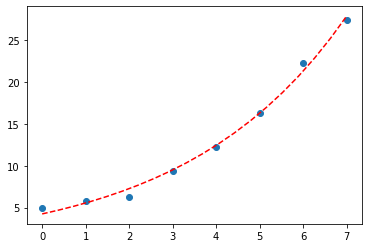

G = 0.2691708790698116

R0 = 2.884196153488681


In [106]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 8)

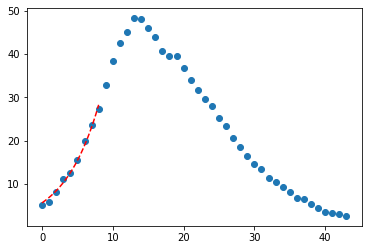

G = 0.20223143515812864

R0 = 2.4156200461069


In [109]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 9)

In [42]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100,300)


    mu = 1/7       # recovery rate
    beta = 0.035   # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [43]:
nsim = 12
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [44]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

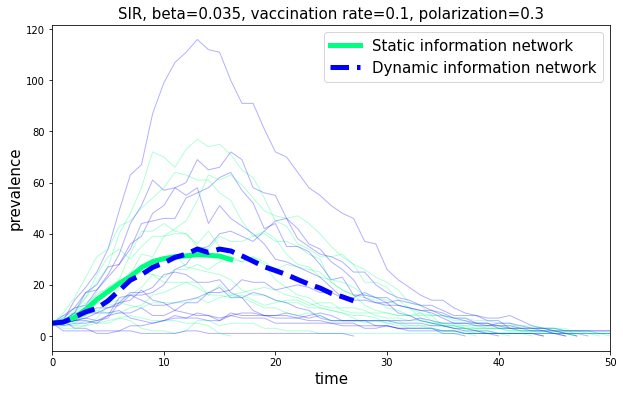

In [45]:
beta = 0.035    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

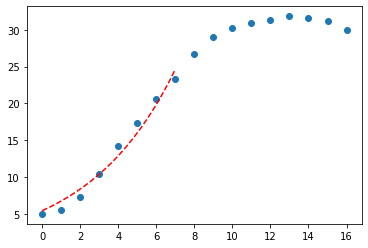

G = 0.21579503363484617

R0 = 2.510565235443923


In [46]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 8)

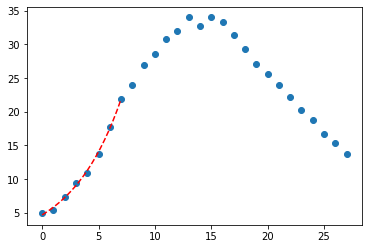

G = 0.22114290151610297

R0 = 2.5480003106127205


In [47]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 8)

## R0 Exponential Fit Estimation

In [60]:
# Una volta fatte le simulazioni e calcolate le traiettorie medie si può fare calcolare R0 in questo modo
# R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 8)

## Simulazioni al variare del numero iniziale di novax

Influisce sull'incidenza, ma non sulla separazione delle curve statico/dinamico

### 200 no vax

In [159]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100, 300)


    mu = 1/7       # recovery rate
    beta = 0.07    # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [160]:
nsim = 24
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [161]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

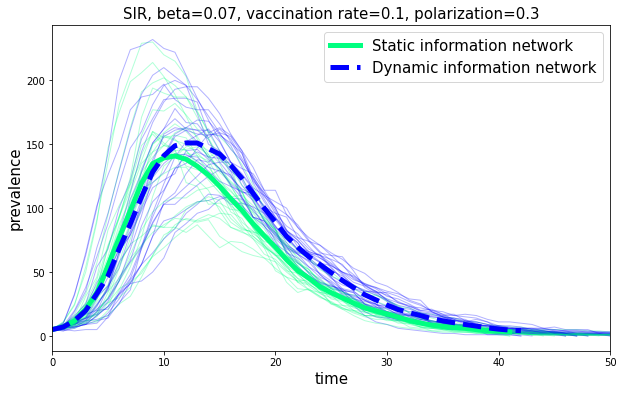

In [162]:
beta = 0.07    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

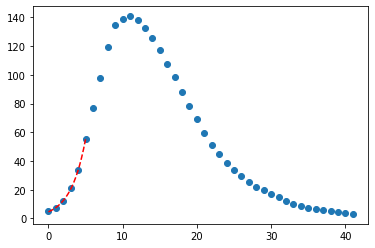

G = 0.4960344314796373

R0 = 4.472241020357462


In [163]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 6)

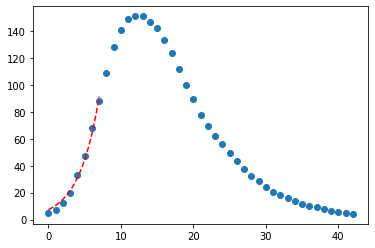

G = 0.3605877718095943

R0 = 3.52411440266716


In [164]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 8)

### 500 no vax

In [165]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100, 600)


    mu = 1/7       # recovery rate
    beta = 0.07    # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [166]:
nsim = 24
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [167]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

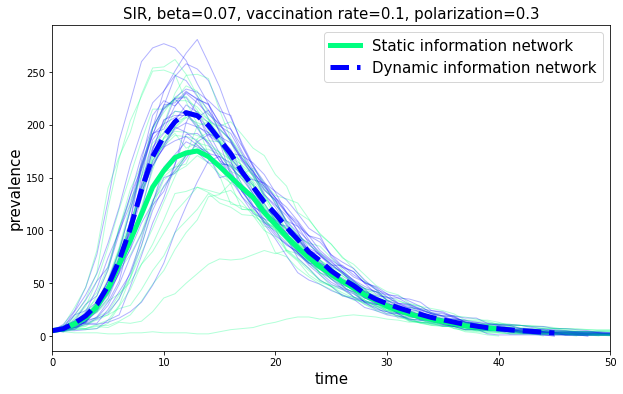

In [168]:
beta = 0.07    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

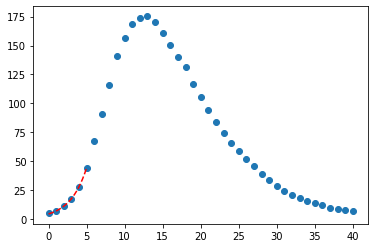

G = 0.46151576314569176

R0 = 4.230610342019842


In [169]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 6)

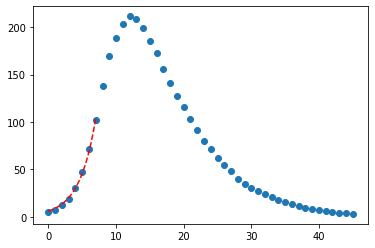

G = 0.41034461552913937

R0 = 3.8724123087039755


In [170]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 8)

### 900 no vax

In [153]:
# Some more statistics
def sim_prevalence():
    N = 1000 # number of nodes
    ave_degree = 10
    initial_infecteds = np.random.choice(np.arange(N), size=5, replace=False)
    initial_no_vax = np.arange(100, 1000)


    mu = 1/7       # recovery rate
    beta = 0.08    # infection rate
    pro = 0.       # rate of classical media influence on people
    pol = 0.3      # propensity of opinion polarization
    r = 0.1        # rate of vaccination for PV

    G_phys = nx.barabasi_albert_graph(N, int(ave_degree/2))
    G_info_static = G_phys.copy()
    utils.initNET_rnd(G_info_static, initial_no_vax)
    G_info_dynamic = G_info_static.copy()
    seed = np.random.randint(time.time())

    sim_static = SIR_net_adaptive(G_phys, G_info_static, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, rewiring=False, message=False, rng=np.random.default_rng(seed))
    sim_dynamic = SIR_net_adaptive(G_phys, G_info_dynamic, beta=beta, mu=mu, r=r, pro=pro, pol=pol, initial_infecteds=initial_infecteds, message=False, rng=np.random.default_rng(seed))
    print('simulation completed')
    return (sim_static, sim_dynamic)

In [154]:
nsim = 24
answers = []
pool = mp.Pool(mp.cpu_count())

results = [pool.apply_async(sim_prevalence) for _ in range(nsim)]
answers = [res.get(timeout=180) for res in results]
pool.close()

simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed
simulation completed


In [155]:
answers = np.array(answers, dtype=object)
static_I = answers[:, 0, [0,2]]
dynamic_I = answers[:, 1, [0,2]]
minlen_static_I = min(list(map(len, static_I[:,1])))
minlen_dynamic_I = min(list(map(len, dynamic_I[:,1])))
ave_I_stat = np.mean([static_I[i,1][:minlen_static_I] for i in range(nsim)], axis=0)
ave_I_dyn = np.mean([dynamic_I[i,1][:minlen_dynamic_I] for i in range(nsim)], axis=0)

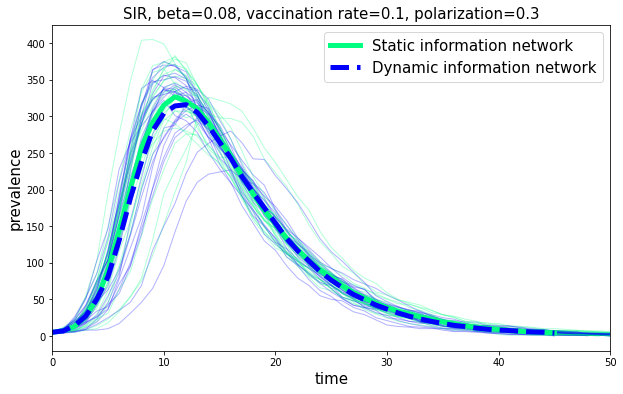

In [156]:
beta = 0.08    # infection rate
pol = 0.3      # propensity of opinion polarization
r = 0.1   

colors = cm.get_cmap('winter', 2)
plt.figure(figsize=(10,6))
plt.title(f'SIR, beta={beta}, vaccination rate={r}, polarization={pol}', size=15)
plt.xlabel('time', size=15)
plt.ylabel('prevalence', size=15)
for curve1, curve2 in zip(static_I, dynamic_I):
    plt.plot(curve1[0], curve1[1], c=colors(1), lw=1, alpha=0.3)
    plt.plot(curve2[0], curve2[1], c=colors(0), lw=1, alpha=0.3)
plt.plot(np.arange(minlen_static_I), ave_I_stat, lw=5, c=colors(1), label='Static information network')
plt.plot(np.arange(minlen_dynamic_I), ave_I_dyn, lw=5, c=colors(0), label='Dynamic information network', ls='dashed')
plt.legend(loc='best', fontsize=15)
plt.xlim(0,50)
plt.savefig(f'./plots/SIR_r{r}_pol{pol}_v1.png')

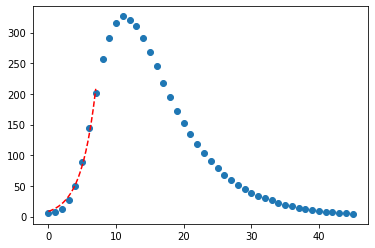

G = 0.45886498454548674

R0 = 4.212054891818408


In [157]:
R0 = fitR0(np.arange(minlen_static_I), ave_I_stat, start = 0, n_points = 8)

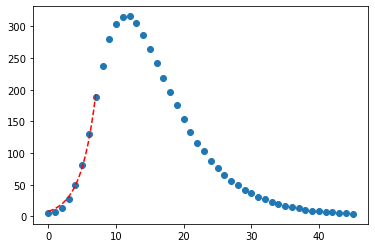

G = 0.4549407102924097

R0 = 4.184584972046868


In [158]:
R0 = fitR0(np.arange(minlen_dynamic_I), ave_I_dyn, start = 0, n_points = 8)